# **Project Name**    - Telecom Churn Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**None
##### **Team Member 2 -**None
##### **Team Member 3 -**None
##### **Team Member 4 -**None

# **Project Summary -**

The dataset contains about telecom churn data.There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully. Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

# **GitHub Link -**

https://github.com/shubhcha/Telecom-Churn-Analysis/

# **Problem Statement**


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# **Business Context**

Orange S.A., formerly france telecom S.A., is a french multinational telecommunications corporation. The orange telecom's churn dataset, consists of cleaned customer activity data (features), along with a churn label specifiying whether a customer cancelled the subscription. Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

#### **Define Your Business Objective?**

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

# ***Let's Begin !***

## ***1. Know Your Data***

First let me import python libraries which will help us a lot through this journey.

Numpy is a library to do high end calculations.

Pandas is a library to help work with dataframes.

Matplotlib and Seaborn are here to help visualize our data

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading and Cleaning

In [ ]:
# Dataset Loading

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Telecom Churn.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(3333, 20)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)

State                     0
Account length            0
Customer service calls    0
Total intl charge         0
Total intl calls          0
Total intl minutes        0
Total night charge        0
Total night calls         0
Total night minutes       0
Total eve charge          0
Total eve calls           0
Total eve minutes         0
Total day charge          0
Total day calls           0
Total day minutes         0
Number vmail messages     0
Voice mail plan           0
International plan        0
Area code                 0
Churn                     0
dtype: int64

In [ ]:
#print unique values
print(df.nunique())

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64


In [ ]:
# Visualizing the missing values
There are no any missing values in the dataset.

### What did you know about your dataset?

The dataset is the sample dataset if we know the difference between the sample and the population dataset then we may know that sample is drawn randomly from the population and this sample dataset has the customers who have left the telecom company.Electronic check mediums are the highest churners. Contract Type – Monthly customers are more likely to churn because of no contract terms, as they are free-to-go customers. No Online security, No Tech Support category are high churners. Non-senior Citizens are high churners.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(df.columns)

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

In [ ]:
# Dataset Describe
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Variables Description


**State:** This variable represents the state in which the customer resides. It provides information about the geographical location of the customer.

**Account length:** This variable represents the length of time (in months) that the customer has been using the service. It indicates the duration of the customer's relationship with the telecom provider.

**Area code:** This variable represents the area code associated with the customer's telephone number. It provides information about the customer's telephone service region.

**International plan:** This variable indicates whether the customer has an international calling plan or not. It is a binary variable that indicates whether the customer has subscribed to an international calling feature.

**Voice mail plan:** This variable indicates whether the customer has a voicemail plan or not. It is a binary variable that indicates whether the customer has subscribed to a voicemail service.

**Number vmail messages:** This variable represents the total number of voicemail messages the customer has received.

**Total day minutes:** This variable indicates the total number of minutes the customer has used for calls during the day.

**Total day calls:** This variable represents the total number of calls the customer has made during the day.

**Total day charge:** This variable represents the total charge for the day calls, including any additional fees or charges.

**Total eve minutes:** This variable indicates the total number of minutes the customer has used for calls during the evening.

**Total eve calls:** This variable represents the total number of calls the customer has made during the evening.

**Total eve charge:** This variable represents the total charge for the evening calls, including any additional fees or charges.

**Total night minutes:** This variable indicates the total number of minutes the customer has used for calls during the night.

**Total night calls:** This variable represents the total number of calls the customer has made during the night.

**Total night charge:** This variable represents the total charge for the night calls, including any additional fees or charges.

**Total intl minutes:** This variable indicates the total number of minutes the customer has used for international calls.

**Total intl calls:** This variable represents the total number of international calls the customer has made.

**Total intl charge:** This variable represents the total charge for the international calls, including any additional fees or charges.

**Customer service calls:** This variable represents the total number of customer service calls made by the customer. It indicates the customer's interaction with the telecom provider's customer service.

**Churn:** This variable is a binary indicator that represents whether the customer has churned (cancelled the service) or not. It indicates customer retention or attrition.


### Check Unique Values for each variable.

In [ ]:
# Dataset Datatypes
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [ ]:
# Check Unique Values for each variable.
df.State.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
df.State.value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [ ]:
df['Area code'].unique()

array([415, 408, 510])

In [ ]:
df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

In [ ]:
df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [ ]:
df['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

In [ ]:
df['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

In [ ]:
df['Number vmail messages'].value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: Number vmail messages, dtype: int64

In [ ]:
df['Customer service calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

In [ ]:
df['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [ ]:
df['Churn'].unique()

array([False,  True])

In [ ]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

**Import Libraries:**

Import the necessary libraries, including pandas for data manipulation and analysis.

In [ ]:
# Write your code to make your dataset analysis ready.
import pandas as pd

**Load Data:**

Load the telecom churn dataset into a pandas DataFrame & create a copy

In [ ]:
# Load dataset & created a copy
churn_data=df.copy()

**Explore Data:**

Take a look at the initial structure of the dataset.

In [ ]:
# Display the first few rows of the dataset
print(churn_data.head())

# Get basic statistics of the dataset
print(churn_data.describe())

# Check data types and missing values
print(churn_data.info())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

**Data Cleaning:**

Handle missing values, duplicate records, and inconsistent data.

In [ ]:
# Handle missing values
churn_data.dropna(inplace=True)

# Remove duplicate records
churn_data.drop_duplicates(inplace=True)

# Handle inconsistent data (e.g., convert categorical values to consistent format)
# Standardize categorical columns to lowercase
categorical_columns = ['International plan', 'Voice mail plan', 'Churn']

for column in categorical_columns:
    if churn_data[column].dtype == 'object':
        churn_data[column] = churn_data[column].str.lower()

In [ ]:
churn_data['Total day minutes'] = churn_data['Total day minutes'].astype(float)

 **Feature Engineering** & **Data Transformation:**
Create new relevant features or transform existing features if needed.

Convert categorical variables to numerical format (encoding), normalize or scale numerical features if necessary.

In [ ]:
# One-hot encoding for categorical variables
churn_data_encoded = pd.get_dummies(churn_data, columns=['State', 'International plan', 'Voice mail plan'], drop_first=True)

# Example: Create a new feature 'total_usage' by summing up call, SMS, and data usage columns
# Assuming you want to sum 'Total day minutes', 'Total eve minutes', and 'Total night minutes'
churn_data_encoded['total_usage'] = churn_data['Total day minutes'] + churn_data['Total eve minutes'] + churn_data['Total night minutes']

# Create a new 'account_balance' column based on existing columns
churn_data_encoded['account_balance'] = churn_data_encoded['Total day charge'] + churn_data_encoded['Total eve charge'] + churn_data_encoded['Total night charge']

# Feature scaling (e.g., using Min-Max scaling)
# Scale both 'total_usage' and 'account_balance' columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['total_usage', 'account_balance']
churn_data_encoded[columns_to_scale] = scaler.fit_transform(churn_data_encoded[columns_to_scale])


**Data Splitting:**

If you're planning to build a predictive model, split the data into training and testing sets.

In [ ]:
# Let's split our data
from sklearn.model_selection import train_test_split
X = churn_data_encoded.drop('Churn', axis=1)  # Features
y = churn_data_encoded['Churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Univariate analysis & Bivariate analysis

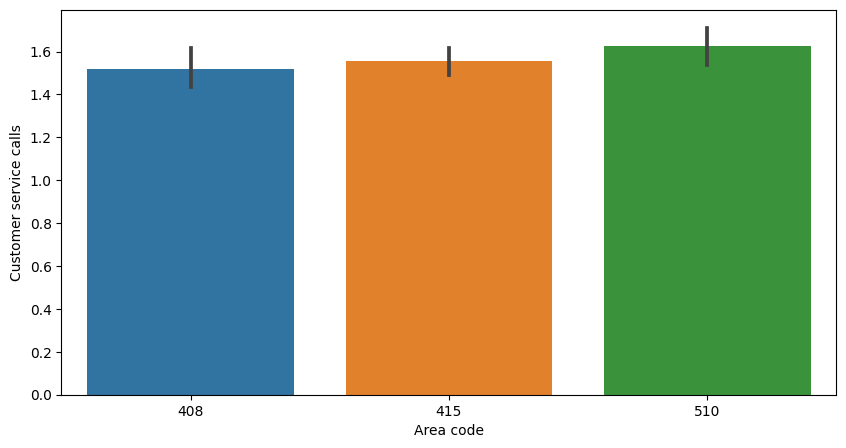

In [ ]:
# Chart - 1 visualization code
# Let's show the relationship between Area Code & Customer Service Calls using barplot
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Area code", y="Customer service calls", data=df)

##### 1. Why did you pick the specific chart?

To show the relationship between customer service calls and area code. We have area codes are 408, 415 and 510. Customer service calls ranging from 0 to 9.

##### 2. What is/are the insight(s) found from the chart?

Customers from 510 area code have the highest frequency of calls to customer care center as compared to 408 and 415 area code.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, if we see that there is an average customer calls placed from each area code which may be create a positive business impact if we do some effort to reduce the calls make by the clients.

No, there is not lead to negative growth if we try to provide better services and offers to our clients they not might be churn to other operator.

#### Chart - 2

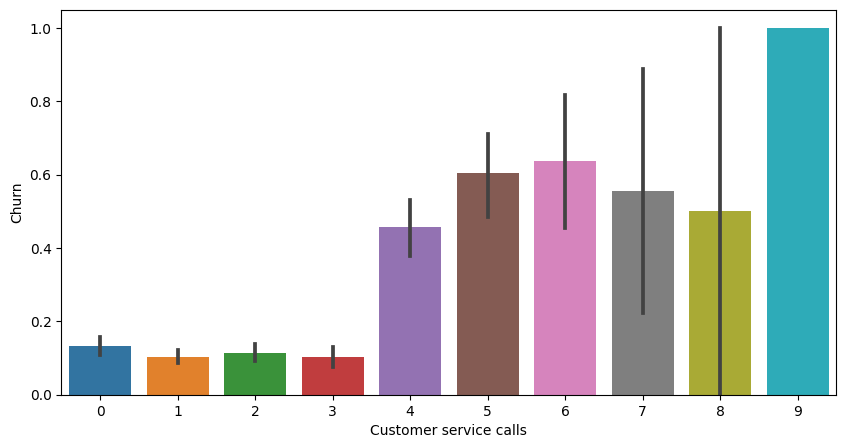

In [ ]:
# Chart - 2 visualization code
# To show the relationship between Churn & Customer Service Calls using barplot
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Customer service calls", y="Churn", data=df)

##### 1. Why did you pick the specific chart?

To show the comparison between customer service calls and churn data. We have churn are in the boolean variable i.e.,true & false. Customer service calls ranging from 0 to 9.

##### 2. What is/are the insight(s) found from the chart?

Customers who had called 9 times to customer care center have the highest one to become churned as compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, it will not create a positive impact on business because customer calls is higher than 8 times which would not good.

Yes, it will lead to negative growth as trends are showing that frequency is higher on 9 times some customers churn and drop their existing operators which are currently use at present.

#### Chart - 3

<ipython-input-36-afde1048a8bd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Total day minutes'], color = 'orange')


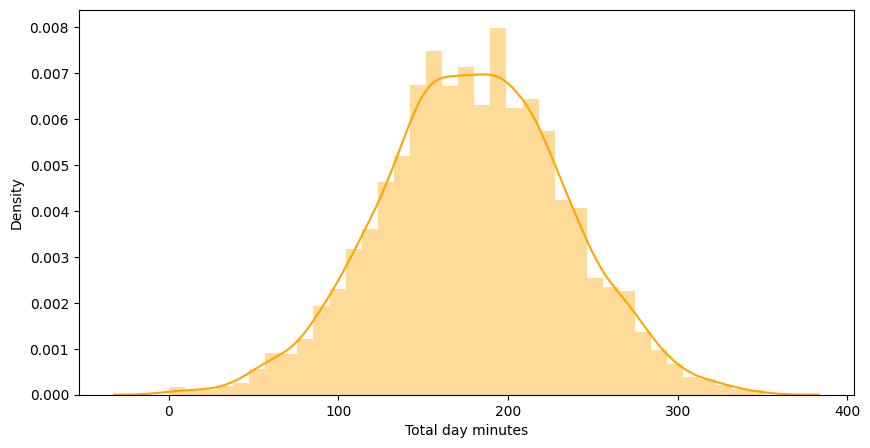

In [ ]:
# Chart - 3 visualization code
# Let's show Total day minutes using distplot
plt.figure(figsize=(10,5))
ax = sns.distplot(df['Total day minutes'], color = 'orange')

##### 1. Why did you pick the specific chart?

To show the distribution of total day minutes as how much the customer spend time to utilize the total minutes which have provided to their respective operators by making them to call and talk to someone.

##### 2. What is/are the insight(s) found from the chart?

Customers are in the range of 200 minutes have consume the highest usage of minutes on total day while 0 and 400 is the minimum usage of minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will create because if we see patterns are first likely to be slight increase and then decrease. At a point of time their peak level rise at 200 minutes which is the highest.

No, it will not lead to negative growth as customers are utilize their total day minutes properly which is provided to their existing operators.

#### Chart - 4

<ipython-input-37-d1fe729fac9d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Total intl calls'], color = 'blue')


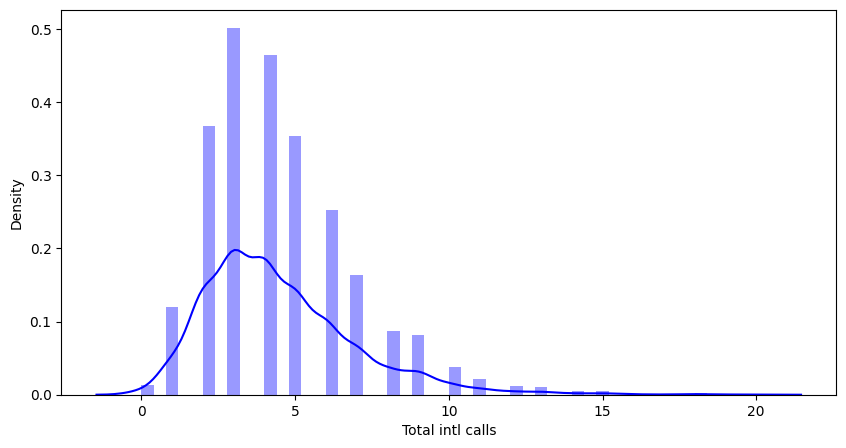

In [ ]:
# Chart - 4 visualization code
# Let's show Total intl calls using distplot
plt.figure(figsize=(10,5))
ax = sns.distplot(df['Total intl calls'], color = 'blue')

##### 1. Why did you pick the specific chart?

To show the distribution of total intl calls as how much the customer spend time to utilize the total calls which have provided to their respective operators by placing them call and talk to someone internationally.

##### 2. What is/are the insight(s) found from the chart?

Customers which are in the range of between 0 to 5 times have make calls the maximum times and 20 times is the minimum who have often place calls internationally as shown in the chart.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will create a positive impact on business as a few customers are using international call services that will beneficial to our business.

No, it will not lead to negative growth because if we see from between 0 to 5 range from the graph itself is the peak level that they use this facility at that stage of time to call maximum number of times internationally.

#### Chart - 5

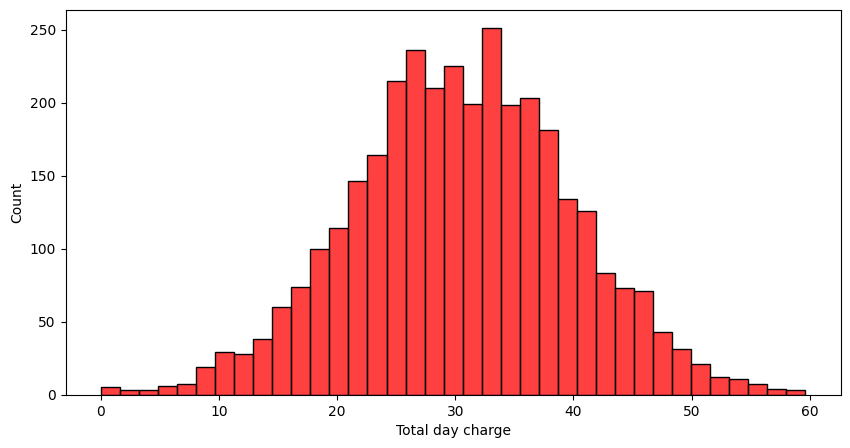

In [ ]:
# Chart - 5 visualization code
# Let's show Total day charge using histplot
plt.figure(figsize=(10,5))
ax = sns.histplot(df['Total day charge'], color = 'red')

##### 1. Why did you pick the specific chart?

The chart which is use by me is the histogram. I use this specific chart to show that the total day charge which is bear by the customers by making them calls in the morning.


##### 2. What is/are the insight(s) found from the chart?

Customers which are in the range of between 30 to 40 rupees have the highest charge as shown in the chart and rest have the minimum day charge which is bear by themselves.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will create because customers do calls on an average which would lead to increase at a point of time that total day charge paid to the operators.

No, not lead to negative growth to the business as they use calling services which is charged by the operators for each call according to their plan on that particular day.

#### Chart - 6

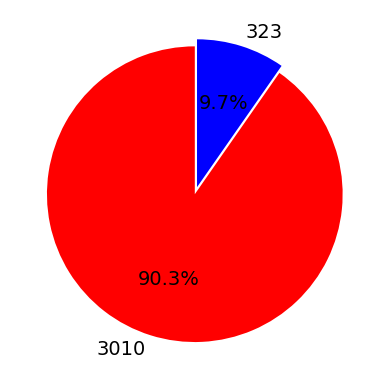

In [ ]:
# Chart - 6 visualization code
# Now let's show International plan using piechart
labels = df['International plan'].value_counts()
sizes = df['International plan'].value_counts()
explode = (0, 0.05)
colors = ['red', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})
plt.show()

##### 1. Why did you pick the specific chart?

I pick pie chart to show that which customers are not having the international plan and which one have subscribed this service.

##### 2. What is/are the insight(s) found from the chart?

As it shows in the pie chart that 3010 customers are not susbcribed the international plan while only 323 people are using this service.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, it will not create because if we see in pie chart that only 323 customers are having international plan and rest 3010 are don't have which is big amount in numbers.

Yes, it will lead to negative growth as many customers are not might be satisfied with the service or it may cost very high which is provided to their respective operators only a few are using this service.

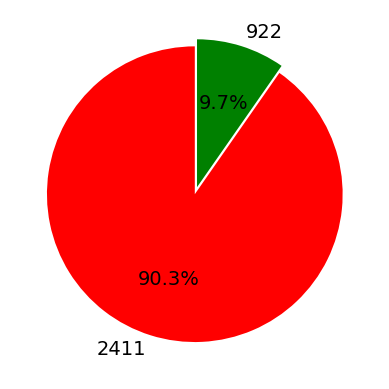

In [ ]:
# Chart - 7 visualization code
# Now let's show Voice mail plan using piechart
labels = df['Voice mail plan'].value_counts()
explode = (0, 0.05)
colors = ['red', 'green']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})
plt.show()

##### 1. Why did you pick the specific chart?

I again pick the pie chart to show that which customers are not having the voice mail plan and which one have subscribed this service.

##### 2. What is/are the insight(s) found from the chart?

As it shows in the pie chart that 2411 customers are not susbcribed the voice mail plan while only 922 people are using this service

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No, it will not create because if we see in pie chart that only 922 customers are having voice mail plan and rest 2411 are don't have which is big in numbers.

Yes, it will lead to negative growth as many customers are not might be satisfied with the service or their is no use for them which is provided to their respective operators only a few have using this service.

#### Chart - 8

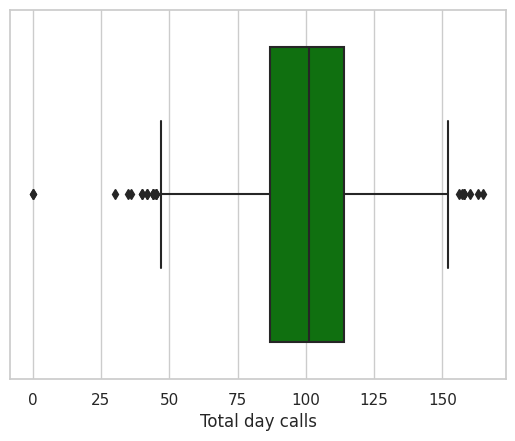

In [ ]:
# Chart - 8 visualization code
# Now let's show Total day calls using boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Total day calls'], color ='green')

##### 1. Why did you pick the specific chart?

The chart which is use by me is the boxplot to show the total day calls which is placed by the customers in morning.

##### 2. What is/are the insight(s) found from the chart?

What insight i have been found in this chart that we have total number of calls ranging from between 80 to 110 have the highest number of calls made by the customers as shown in the chart makes a box plot of them.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will create positive impact because customers do calls are higher than as expected in a day.

No, their is no negative growth as calls are sufficient done by the customers in a day.

#### Chart - 9

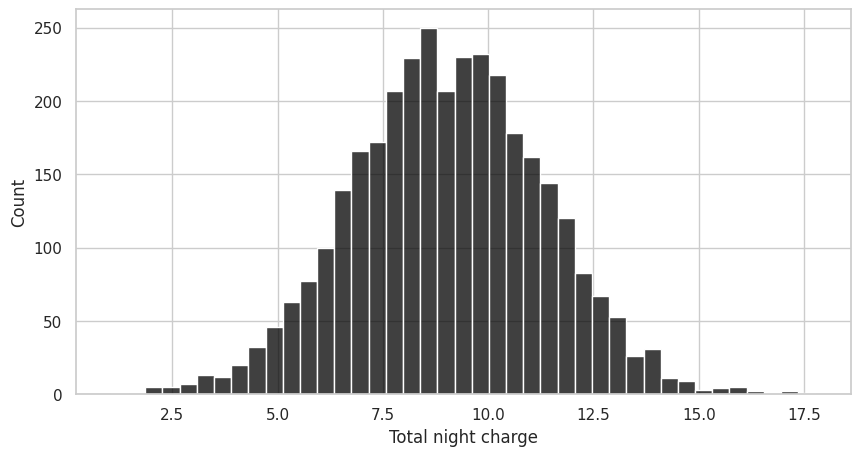

In [ ]:
# Chart - 9 visualization code
# Now let's show Total night charge using histplot
plt.figure(figsize=(10,5))
ax = sns.histplot(df['Total night charge'], color = 'black')

##### 1. Why did you pick the specific chart?

The chart which is use by me is the histogram. I use this specific chart to show that the total night charge which is bear by the customers by making them calls in night.

##### 2. What is/are the insight(s) found from the chart?

Customers which are in the range of between 7.5 to 10 rupees have the highest charge as shown in the chart and rest have the minimum day charge which is bear by themselves.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will create because customers do calls on an average which would lead to increase at between 7.5 to 10 rupees the total night charge paid to the operators.

No, not lead to negative growth to the business as they use night calling services which is provided to their operators and charged for each call according to their plan on that particular night.

#### Chart - 10

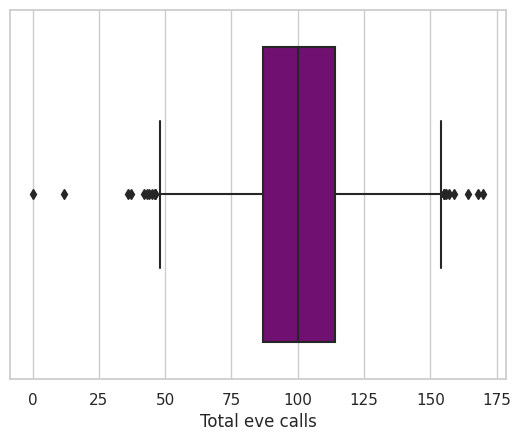

In [ ]:
# Chart - 10 visualization code
# Now let's show Total eve calls using boxplot
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['Total eve calls'], color= 'purple')

##### 1. Why did you pick the specific chart?

The chart which is use by me is the boxplot to show the total eve calls which is made by the customers in evening.

##### 2. What is/are the insight(s) found from the chart?

What insight i have been found from this chart that we have total number of calls ranging from between 80 to 110 have the highest number of calls made by the customers as shown in the chart indicates a box plot of itself.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will create positive business impact because customers do calls are higher than as expected in an evening.

No, their is no negative growth as calls are sufficient done by the customers in an evening.

#### Chart - 11

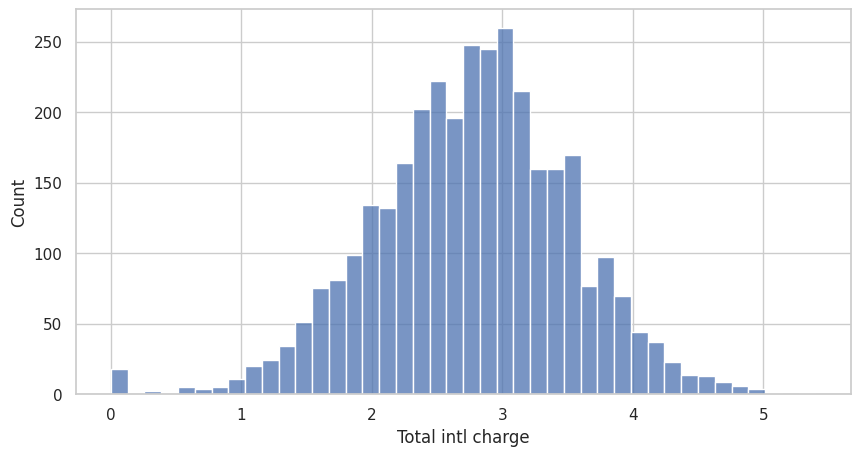

In [ ]:
# Chart - 11 visualization code
# Now let's show Total intl charge using histplot
plt.figure(figsize=(10,5))
ax = sns.histplot(df['Total intl charge'])

##### 1. Why did you pick the specific chart?

The chart which is use by me again is the histogram. I use this specific chart to show that the total intl charge which is bear by the customers by making them calls internationally.

##### 2. What is/are the insight(s) found from the chart?

Customers which bear only 3 rupees have the highest charge as shown in the chart and rest have the minimum day charge which is bear by themselves.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will create because customers do calls on an average which would lead to increase at between 2 to 4 rupees the total intl charge paid to the operators.

No, not lead to negative growth for the business as they use intl calling services which is provided to their operators and charged for each call according to their plan internationally.

#### Chart - 12

<ipython-input-45-e826d0f8bae3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Total intl minutes'])


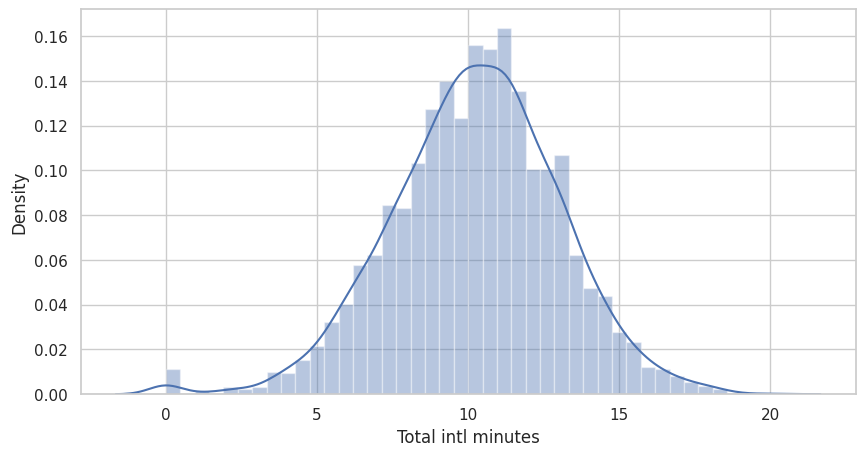

In [ ]:
# Chart - 12 visualization code
# Now let's show Total intl minutes using distplot
plt.figure(figsize=(10,5))
ax = sns.distplot(df['Total intl minutes'])

##### 1. Why did you pick the specific chart?

To show the distribution of total intl minutes as how much the customer spend time to utilize the total minutes which have provided to their respective operators by placing them call and talk to someone.

##### 2. What is/are the insight(s) found from the chart?

Customers are in the range of between 10 to 15 minutes have consume the highest usage of minutes on total day while 0 and 20 is the minimum usage of minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will create because if we see patterns are first likely to be slight increase and then decrease. At a point of time their peak level rise at 10 minutes which is the highest.

No, it will not lead to negative growth as customers are utilize their total intl minutes properly which is provided to their existing operators.

#### Chart - 13 - Correlation Heatmap

<ipython-input-46-31ad6ad7a6ed>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="coolwarm", annot=True)


<Axes: >

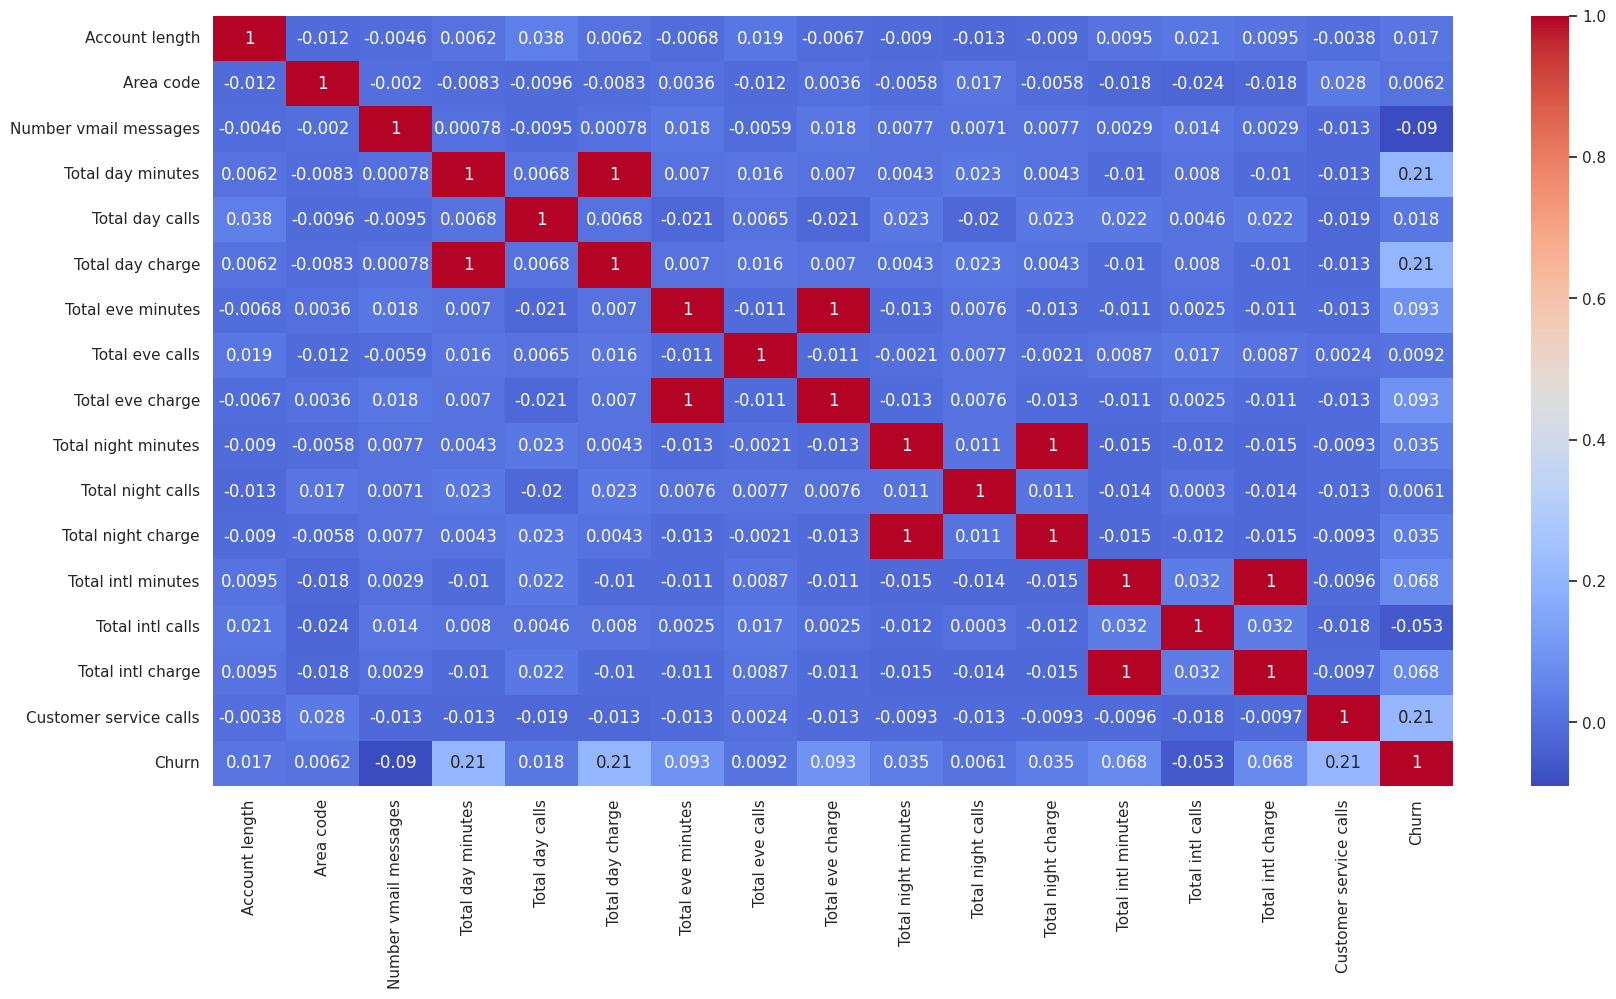

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

In the given code snippet, a heatmap is created using sns.heatmap() to visualize the correlations between different columns of the DataFrame (df). The heatmap represents the correlation values as colors, with annotations showing the correlation coefficients.

The specific chart, a heatmap, is chosen because it effectively displays the correlation between variables in a tabular form.

Here are some reasons for choosing a heatmap for this scenario:

**Correlation Analysis:** Heatmaps are commonly used for analyzing and visualizing the correlation between variables. In this case, the heatmap allows for a quick understanding of the relationships between different columns in the DataFrame.

**Visual Representation of Correlations:** Heatmaps use colors to represent correlation values, allowing for an intuitive visual interpretation of the strength and direction of the relationships. Colors can indicate positive or negative correlations, with different intensities denoting the magnitude of the correlations.

**Tabular Structure:** The heatmap presents the correlation matrix in a tabular format, making it easier to read and analyze the correlations between each pair of columns. The vertical and horizontal axes represent the variables, while the cells in the heatmap present the correlations between the variables.

**Annotation of Correlation Coefficients:** By setting annot=True, the heatmap includes annotations that display the actual correlation coefficients within each cell. This further enhances the interpretation and understanding of the correlation values.

**Color Map Customization:** By specifying the cmap="coolwarm" parameter, the heatmap uses a color map that transitions smoothly from cool (lighter) to warm (darker) colors. This choice allows for better visual differentiation between positive and negative correlations.

**Space Efficiency:** Heatmaps provide a compact visualization of correlation matrices, effectively utilizing space on the chart to present a large amount of information in a concise and readable manner.

Given the goal of analyzing the correlations between columns in the DataFrame, the heatmap is a suitable choice to visually represent the correlation matrix and facilitate the identification of relationships and patterns among variables.

##### 2. What is/are the insight(s) found from the chart?

From the given heatmap, which visualizes the correlations between different columns of the DataFrame, several insights can be derived:

**Strength and Direction of Correlations**: The heatmap allows for the identification of the strengths and directions of correlations between variables. Positive correlations are indicated by warmer colors, while negative correlations are represented by cooler colors. The color intensity provides insights into the magnitude of the correlations.

**Strong Correlations:** The heatmap helps identify pairs of variables that exhibit strong positive or negative correlations. Cells with darker colors indicate higher magnitudes of correlation coefficients, highlighting variables that are strongly associated with each other.

**Weak or No Correlations**: Areas of the heatmap with lighter or neutral colors suggest weak or no correlations between variables. These cells indicate variables that do not have a significant linear relationship.

**Patterns and Clusters:** By observing patterns or clusters of similar colors along rows or columns, the heatmap can reveal groups of variables that are more strongly correlated with each other. These clusters can provide insights into the relationships and dependencies among related variables.

**Self-Correlation:** Diagonal cells of the heatmap, representing the correlation of a variable with itself, will always be perfectly correlated and show the highest correlation coefficient of 1. This is expected and does not provide additional insights.

**Identifying Multicollinearity:** The heatmap can help identify multicollinearity, which occurs when variables are highly correlated with each other. High correlations between predictors can affect the interpretation and stability of regression models.


#### Chart - 14 - Pair Plot

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the telecom churn dataset
df = pd.read_csv('/content/drive/MyDrive/Telecom Churn.csv')

# Create a pair plot
sns.set(style="ticks")
sns.pairplot(churn_data, hue="Churn", diag_kind="kde")

# Display the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

The specific chart chosen here is a pair plot created using Seaborn's pairplot function. A pair plot is often used to visualize the pairwise relationships between different numerical variables in a dataset. Each combination of variables is represented by a scatterplot, and the diagonal of the plot typically displays kernel density estimates (KDE) for each individual variable. The hue parameter is used to color the data points based on the "Churn" variable, which is a categorical variable indicating whether a customer has churned or not.

##### 2. What is/are the insight(s) found from the chart?

1.The scatterplots in the upper and lower triangles of the pair plot show the relationships between pairs of numerical variables. These scatterplots can help identify correlations or patterns between variables. For example, you can look for trends or differences in how variables behave for customers who have churned ("Churn" = Yes) compared to those who have not churned ("Churn" = No).

2.The KDE plots on the diagonal show the distribution of each individual numerical variable. This can help you understand the distribution of features in the dataset and whether there are differences in the distributions for churned and non-churned customers.

3.By using the hue parameter to color the data points based on "Churn," you can visually assess whether there are distinct patterns or separations in the data points between the two churn categories. For example, if the scatterplots show that churned customers tend to cluster in certain regions of the plot, it suggests that certain combinations of variables may be associated with higher churn rates.

## **4. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Suggestions to achieve business objective are as follows:

1.Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).

2.Target the customers, whose outgoing others charge in July and incoming others on August are less.

3.Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.

4.Customers, whose monthly 3G recharge in August is more, are likely to be churned.

5.Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.

6.Customers decreasing monthly 2g usage for August are most probable to churn.

7.Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.

8.roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.

# **Conclusion**

These are some of the quick insights on churn analysis from this EDA Project.

1.Electronic check mediums are the highest churners

2.Contract Type – Monthly customers are more likely to churn because of no contract terms, as they are free-to-go customers.

3.No Online security, No Tech Support category are high churners.

4.Non-senior Citizens are high churners.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***